# MNIST Handwritten Digit Recognition
ADRIJA SENGUPTA 102203509

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# Loading the MNIST datasets

In [2]:
data_df = pd.read_csv("data.csv")
#test_df = pd.read_csv("test.csv")

In [3]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#test_df.head()

# For train and test both we will use train.csv (Taking train data as complete data)

In [5]:
data_df.shape

(42000, 785)

# Data Preparation for Model Building

In [6]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [7]:
#x_for_test_data=test_df[:]

In [8]:
type(x)

pandas.core.frame.DataFrame

6


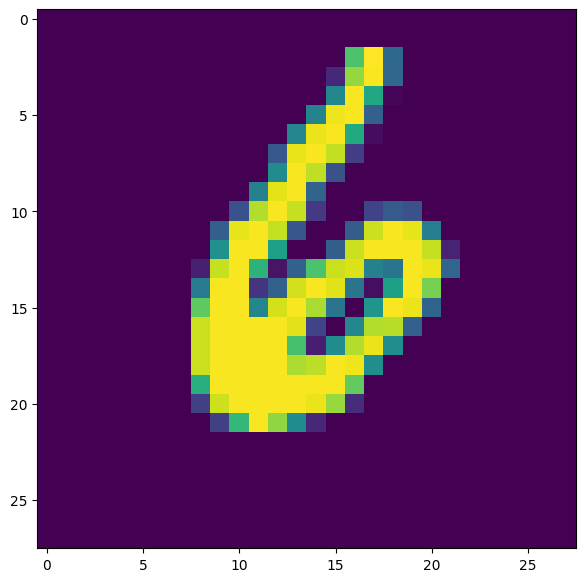

In [9]:
plt.figure(figsize=(7,7))
some_digit=1266
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

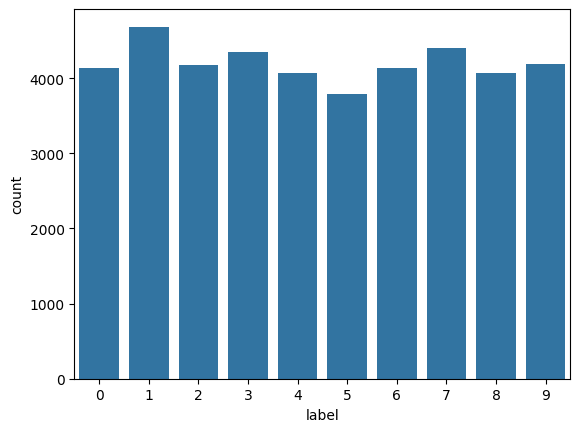

In [10]:
sns.countplot( x='label', data=data_df) 

#### we can conclude that our dataset is balanced

# Splitting the train data  into train and test 

In [11]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 40)

# from sklearn.model_selection import  train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

# from sklearn.model_selection import  train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

# from sklearn.model_selection import  train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)

# from sklearn.model_selection import  train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 40)

# from sklearn.model_selection import  train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 40)

In [12]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

# **Models**

# KNN

In [13]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

# k=2

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train, y_train)

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 4)
# classifier.fit(x_train, y_train)

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5)
# classifier.fit(x_train, y_train)

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 6)
# classifier.fit(x_train, y_train)

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 7)
# classifier.fit(x_train, y_train)

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 10)
# classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.9542857142857143


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1617
           1       0.95      1.00      0.97      1871
           2       0.97      0.96      0.97      1713
           3       0.93      0.96      0.94      1803
           4       0.95      0.97      0.96      1642
           5       0.93      0.94      0.94      1506
           6       0.98      0.98      0.98      1612
           7       0.94      0.96      0.95      1752
           8       0.98      0.87      0.93      1588
           9       0.96      0.89      0.93      1696

    accuracy                           0.95     16800
   macro avg       0.96      0.95      0.95     16800
weighted avg       0.95      0.95      0.95     16800



In [18]:
print(confusion_matrix(y_test, y_pred))

[[1612    0    2    0    0    1    2    0    0    0]
 [   0 1867    0    0    0    0    0    1    1    2]
 [  12   18 1652    7    2    1    1   15    2    3]
 [   5    7   18 1733    1   19    0    8   10    2]
 [   3   19    1    0 1594    0    5    3    0   17]
 [   7    3    3   54    3 1418   13    0    0    5]
 [  21    1    0    0    3   13 1574    0    0    0]
 [   1   29    8    5    5    0    0 1684    1   19]
 [  13   21   17   53   12   56    5   13 1388   10]
 [   8    8    2   17   66   10    1   66    8 1510]]


In [19]:
#y_pred_on_test_data = classifier.predict(x_for_test_data)
#y_pred_on_test_data

## **3NN-96.65% accuracy**